In [29]:

import pandas as pd
import re

In [30]:
# tag_live 크롤링.
df = pd.read_csv("/content/drive/My Drive/캡스톤디자인/tag_live_hs.csv", sep=",", header=None,encoding="cp949")

# 칼럼 이름 변경
df.columns = ["sentiment","text"]

# 칼럼 위치 변경
# df = df[[ "sentiment" ,"text"]]
 
 # None 값 제거
df = df.dropna()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 0 to 658
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  659 non-null    object
 1   text       659 non-null    object
dtypes: object(2)
memory usage: 15.4+ KB


,sentiment,text
0,surprise,고급진 아..기절기절.. 샤워하고 있는데 난리난리~~ 갑자기 엄마~~!!!!!! 큰...
1,surprise,당신이 잠든 사이에~ 남편이 잘 때 옆에서 잠깐 핸드폰으로 메일 정리 하고 인스타를...
2,surprise,월요일 아침부터 비가 내리네요 가물다고 하는데 단비가 되었는지... 코로나 환자는 ...
3,surprise,오늘 우리 둘째랑 신나게 웃으며 놀다가 갑자기 입천장 쪽에 뭔가 동그랗게 데인것처럼...
4,surprise,쇼파에 앉아서 뒤에 몰래찍엇는데 ㅎ 카메라캐치~ 근데 표정이 왜이렇게 므흣한 표정으...
...,...,...
654,joy,아름다운 행동은 아름다운 자태보다 낫습니다. 아름다운 행동은 조각상이나 그림보다 더...
655,joy,퇴근길에 구름이 이뻐서 찍고 밤하늘 달이 이뻐서 찍고 초록초록 나무가 이뻐서찍고 사...
656,joy,"주말여행 대전 1박2일 맛있는거 먹고, 쇼핑 반지, 팔찌도 맞추고 옷도사고 수다수다..."
657,joy,권도윤네가 병지방에서 캠핑해서 급으로 꼽사리갔던날인데 애들 왜케 작고 귀여워 저날 ...


In [31]:
df.sentiment.value_counts()

sadness     192
joy         191
anger        97
love         66
surprise     57
fear         56
Name: sentiment, dtype: int64

In [32]:
df.sentiment.unique()

array(['surprise', 'fear', 'anger', 'love', 'sadness', 'joy'],
      dtype=object)

In [33]:
# 빌려온 csv파일
df1 = pd.read_csv("/content/drive/My Drive/캡스톤디자인/test_data1.tsv", sep="\t", header=None, encoding="UTF-8")
df1.columns = ["sentiment", "text"]

df1 = df1[["text", "sentiment"]]
df1 = df1.dropna()

#neutral 행 제거
idx_nm_neutral= df1[df1['sentiment'] == 'neutral'].index
df999 = df1.drop(idx_nm_neutral)

# 잘못 표기된 'anger ' 행 제거
idx_nm_angerErr= df999[df999['sentiment'] == 'anger '].index
df1 = df999.drop(idx_nm_angerErr)
df1

# 칼럼 위치 변경
df1 = df1[[ "sentiment" ,"text"]]

df1

,sentiment,text
0,joy,오예 오늘 휴강이다!!!
1,love,"사랑한다. 이 세상 하나뿐인 내 아내와 아들, 딸"
2,sadness,오늘 감기에 걸렸다..
3,joy,놀이공원 놀러왔다 신난다! >_<
4,sadness,아 외롭다..ㅜ
...,...,...
1360,anger,ㅡㅡ 왜자꾸 카톡해
1361,sadness,휴.....
1362,joy,이것도 되나욬ㅋㅋㅋㅋㅋ
1363,surprise,헉 정말요? .....뭔가 그사람들은 이번엔 뭘낼까 고민하는것도 일이겠어요... 아...


In [34]:
df1.sentiment.unique()

array(['joy', 'love', 'sadness', 'anger', 'surprise', 'fear'],
      dtype=object)

In [35]:
df1.sentiment.value_counts()

joy         588
sadness     293
anger       154
surprise    110
love         53
fear         20
Name: sentiment, dtype: int64

In [36]:
df2 = pd.read_csv("/content/drive/My Drive/캡스톤디자인/감정분류_데이터셋_최종.csv", sep=",", header=None,encoding="cp949")

# 칼럼 이름 변경
df2.columns = ["sentiment","text"]

# 칼럼 위치 변경
# df2 = df2[["text", "sentiment]]
 
 # None 값 제거
df2 = df2.dropna()

# 0번째 인덱스 삭제
df2 = df2.drop(df2.index[0])

df2

,sentiment,text
1,anger,100만 한번이면 말 다했지. 3.1운동도 100만이다. 몇번을 해야하나
2,surprise,1시간 때울겸 회원가입하고 겜하다 20분하고 웹써핑한 기억이 납니다...
3,surprise,1천만명이란다ㅋㅋ전부 10배이상 뻥튀기 숫자를 그대로인정한거네 역시sbs
4,surprise,500일 기념하던 때가 엊그제 같은데 시간 진짜 빨리 가는 것 같아요ㅠㅠ
5,surprise,se가 일본과 유럽서는 호평이 자자한데어째서 한국서는 저리 비판 받는거지
...,...,...
2654,joy,메시는 그닥 노잼일거같고... 그냥 섭외한다면 섭외능력에 감탄할뿐 솔직히 재미는 없...
2655,fear,우주의 미세먼지의 미세먼지만도 못 한 크기의 지구에서 사는 인간이 우주의 먼지만도 ...
2656,anger,대구 비오고 있다 이 구라청 개 호 루 쉬키들아 주둥아리를 아작 내고 싶다 개상청 ...
2657,anger,일단 폭스바겐 사태를 떠나서 뒤에서 쥐샛끼 짓거리하는놈이 있는것같다. 난 흉다이가 ...


In [37]:
# df2.sentiment.unique()
df2.sentiment.value_counts()

anger       643
joy         570
fear        532
sadness     526
surprise    387
Name: sentiment, dtype: int64

In [38]:
# tag_live 크롤링.
df3 = pd.read_csv("/content/drive/MyDrive/캡스톤디자인/tag_live.csv")
df3 = df3[["text", "keyword"]]
df3.columns = ["text", "sentiment"]
df3 = df3[["sentiment", "text"]]

# 'neutral' 행 제거
idx_nm_neutral= df3[df3['sentiment'] == 'neutral'].index
df3 = df3.drop(idx_nm_neutral)


df3[:10]

,sentiment,text
0,anger,늘 즐겁고 재밌는 유익한 시간이 되세요 - 우리집 고양이 화났음이건 고양인지 호랑이...
1,anger,"<article author_link=""//instagram.com/p/CFN9vh..."
2,anger,"<article author_link=""//instagram.com/p/CFN6RO..."
3,anger,#자기#똥서유니라고#놀렷다그#화났음 #아진~짜이상하네#세살의반란#자기#똥서유니라고#...
4,anger,"<article author_link=""//instagram.com/p/CFKSm5..."
5,anger,#화났음#인상파#코에 상처# 잠깐 한눈 판 사이에 긁어놓음#상처엔 마데카솔?#화났음...
6,anger,"<article author_link=""//instagram.com/p/CFAADW..."
7,anger,#화났음#사진#제발이뿌게좀..#발이야발#ㅋㅋ#오늘도맑음#하늘도맑음#오늘의운동화#컨버...
8,anger,거울만 보면 힘 주기 바쁨🏋🏻‍♂️#헬창남치...
9,anger,"<article author_link=""//instagram.com/p/CEy1Jx..."


In [39]:
df3.sentiment.unique()

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [40]:
df3.sentiment.value_counts()

sadness     377
anger       178
joy         142
fear        123
surprise    107
love         82
Name: sentiment, dtype: int64

#데이터 프레임 합치기

In [41]:
# df 에 df1, df2, df3 데이터프레임 합치기.
df = df.append(df1)
df = df.append(df2)
df = df.append(df3)

In [42]:
# 데이터 프레임 셔플
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [43]:
# df.sentiment.unique()
df.sentiment.value_counts()

joy         1491
sadness     1388
anger       1072
fear         731
surprise     661
love         201
Name: sentiment, dtype: int64


# 전처리 해봐야 할것
- 문장에 url 주소들이 많은 것들.
- 반복되는 문장

In [44]:
def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    # pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    pattern = 'https?://(\w*:\w*@)?[-\w.]+(:\d+)?(/([\w/_.]*(\?\S+)?)?)?' # URL제거
    # pattern = '/^(file|gopher|news|nntp|telnet|https?|ftps?|sftp):\/\/([a-z0-9-]+\.)+[a-z0-9]{2,4}.*$/' # URL제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(amp)|(gt)|(lt)|_|[0-9]'         # amp 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    return text

In [45]:
# 전처리 실행
df["text"] = df["text"].apply(lambda x: clean_str(x))

In [46]:
df.shape

(5544, 2)

# (조건부 확인) BERT 모델에 맞게 데이터 변환

- 문자열의 길이를 세서 100글자 이내라면 삭제


In [47]:
# 문자열의 길이를 세서 100글자 이내라면 삭제
sum=0

change_csv= pd.DataFrame(columns=['text', "sentiment"])

for i in range(len(df['text'])):
  if(len(df['text'][i])>=100): #길이가 100이상이면
    change_csv.loc[sum]=df.loc[i]
    sum+=1
# print(change_csv)

# csv 저장
change_csv.to_csv('/content/drive/My Drive/캡스톤디자인/최종전처리_데이터셋.csv')

In [51]:
df = pd.read_csv("/content/drive/My Drive/캡스톤디자인/최종전처리_데이터셋.csv",index_col = 0)

In [52]:
df.sentiment.value_counts()

sadness     510
joy         324
anger       272
fear        150
love        125
surprise    115
Name: sentiment, dtype: int64

In [53]:
df.shape

(1496, 2)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 1495
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1496 non-null   object
 1   sentiment  1496 non-null   object
dtypes: object(2)
memory usage: 35.1+ KB


In [29]:
# df= df.drop(['Unnamed: 0'], axis=1)
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1496 non-null   object
 1   sentiment  1496 non-null   object
dtypes: object(2)
memory usage: 23.5+ KB


In [111]:
# df.sentiment.value_counts()

sadness     510
joy         324
anger       272
fear        150
love        125
surprise    115
Name: sentiment, dtype: int64

#훈련셋 테스트셋 split

In [ ]:
# text
text = df["text"][:-300]
# BERT의 입력 형식에 맞게 변환
text = ["[CLS] " + str(sentence) + " [SEP]" for sentence in text]
text[:10]
len(text)

1196

#문장길이 확인 (사용 X)

In [ ]:

# text
test_text = df["text"][:-600]
test_text

0      키토제닉 다이어트 식단 너무어렵다 저탄고지 도시락 실패함키토제닉 다이어트 식단 너무...
1      아기가 생기면 해줘야지 하는게 몇개 있다 그중 하나가 이런날 선물 챙겨주기 다른건 ...
2      왜 기상캐스터 보는맛에 뉴스보는데  코디도 나름 잘 신경써서 나오고 앵커들 얼굴만보...
3      상속포기 기간과 절차를 반드시 확인하세요오늘은 고윤기 변호사의 칼럼 상속포기에도 때...
4      그래 난 누군가에겐 봄 누군가에게는 겨울 누군가에겐 끝 누군가에게는 처음 난 누군가...
                             ...                        
891    오늘 온라인 미팅 중에 많이 울었다 슬프거나힘들어서 운 것은 아니다 내가 살아있는 ...
892    어쩌다육아 모성애 따위는 개나 줘버려  생후   일모성애의 뜻을 살펴보면 자식에 대...
893    이 날 엠아롱 솔직히 즴읹이 다 해먹은 날 정귻이 뒤에서 시무룩한 표정하고 씨익 웃...
894    기회가 온다면 고민하지 말고 그 기회를 잡으시길 바래요 그 기회가 자신이 바라고 바...
895     오늘 진짜 정신 도없었는데결국 티켓팅 폭망 나 못보면신나는곳 한복판에서대성통곡 할...
Name: text, Length: 896, dtype: object

In [ ]:
test_text[2500:2525]

Series([], Name: text, dtype: object)

In [ ]:
# for 문 진행 상황 볼 수 있는 라이브러리
from tqdm import tqdm


ntext = []

for sentence in tqdm(test_text):
  # token = []
  words = sentence.split()

  ntext.append(words)
  

100%|██████████| 896/896 [00:00<00:00, 116180.68it/s]


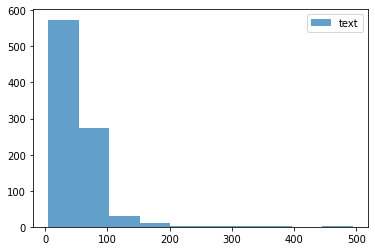

In [ ]:
import matplotlib.pyplot as plt

len_text = []
for data in ntext:
    len_text.append(len(data))

plt.hist(len_text, label='text', alpha=0.7)

plt.legend()
plt.show()

# Label to Integer

In [ ]:
# label이 문자이므로 숫자값으로 바꿔줘야함 - LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

sentiment = label_encoder.fit_transform(df["sentiment"][:-300])


# sentiment = sentiment.reshape(-1,1)
sentiment.shape

(1196,)

In [ ]:
label_encoder.classes_
# label_encoder.inverse_transform(sentiment)

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [ ]:
# 트랜스 포머 설치
!pip install transformers

In [ ]:
import tensorflow as tf
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import random
import time
import datetime

In [ ]:
# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_texts = [tokenizer.tokenize(sent) for sent in text]

print (text[0])
print (tokenized_texts[0])

[CLS] 키토제닉 다이어트 식단 너무어렵다 저탄고지 도시락 실패함키토제닉 다이어트 식단 너무어렵다 저탄고지 도시락 실패함  어후  직장 생활을 오래하면 오래할수록 미친듯이 살이 찌기 시작하더라구요     윤블리의 뷰티다이어리 일 전  키토제닉 다이어트 식단 너무어렵다 저탄고지 도시락 실패함키토제닉 다이어트 식단 너무어렵다 저탄고지 도시락 실패함  어후  직장 생활을 오래하면 오래할수록 미친듯이 살이 찌기 시작하더라구요      [SEP]
['[CLS]', '키', '##토', '##제', '##닉', '다', '##이어', '##트', '식', '##단', '너', '##무', '##어', '##렵', '##다', '저', '##탄', '##고', '##지', '도시', '##락', '실', '##패', '##함', '##키', '##토', '##제', '##닉', '다', '##이어', '##트', '식', '##단', '너', '##무', '##어', '##렵', '##다', '저', '##탄', '##고', '##지', '도시', '##락', '실', '##패', '##함', '어', '##후', '직', '##장', '생', '##활', '##을', '오', '##래', '##하면', '오', '##래', '##할', '##수', '##록', '미', '##친', '##듯', '##이', '살', '##이', '찌', '##기', '시', '##작', '##하', '##더', '##라', '##구', '##요', '윤', '##블', '##리의', '뷰', '##티', '##다', '##이어', '##리', '일', '전', '키', '##토', '##제', '##닉', '다', '##이어', '##트', '식', '##단', '너', '##무', '##어', '##렵', '##다', '저', '##탄', '##고', '##지', '도시', '##락', '실', '##패', '##함', '##키', '##토', '##제', '##닉', '다', '##

In [ ]:
# 입력 토큰의 최대 시퀀스 길이
MAX_LEN = 256

# 토큰을 숫자 인덱스로 변환
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

input_ids[0]

array([   101,   9838,  26444,  17730, 118766,   9056,  86732,  15184,
         9486,  24989,   9004,  32537,  12965, 118879,  11903,   9663,
        66554,  11664,  12508, 101660, 107693,   9489, 119383,  48533,
        21039,  26444,  17730, 118766,   9056,  86732,  15184,   9486,
        24989,   9004,  32537,  12965, 118879,  11903,   9663,  66554,
        11664,  12508, 101660, 107693,   9489, 119383,  48533,   9546,
        31531,   9707,  13890,   9420, 119446,  10622,   9580,  37388,
        38378,   9580,  37388,  14843,  15891,  31398,   9309,  55358,
       118817,  10739,   9408,  10739,   9727,  12310,   9485,  38709,
        35506,  54141,  17342,  17196,  48549,   9627,  92564,  50053,
         9375,  45725,  11903,  86732,  12692,   9641,   9665,   9838,
        26444,  17730, 118766,   9056,  86732,  15184,   9486,  24989,
         9004,  32537,  12965, 118879,  11903,   9663,  66554,  11664,
        12508, 101660, 107693,   9489, 119383,  48533,  21039,  26444,
      

In [ ]:
# 어텐션 마스크 초기화
attention_masks = []

# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
# 훈련셋과 검증셋으로 분리
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids,
                                                                                    sentiment, 
                                                                                    random_state=2020, 
                                                                                    test_size=0.2)

# 어텐션 마스크를 훈련셋과 검증셋으로 분리
train_masks, validation_masks, _, _ = train_test_split(attention_masks, 
                                                       input_ids,
                                                       random_state=2020, 
                                                       test_size=0.2)

# 데이터를 파이토치의 텐서로 변환
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)				

print(train_inputs[0])
print(train_labels[0])
print(train_masks[0])
print(validation_inputs[0])
print(validation_labels[0])
print(validation_masks[0])

train_inputs.shape, train_labels.shape, train_masks.shape

tensor([   101,   9812,   9521,  10530,   9638, 118624,   9010,  11664,   9519,
         28396,  85634,   9954, 118624,   9524,  11664,    100,   9150,  11664,
          9365,  31401,  59894,   8984,  12692,  18622,  11903,   9812,   9912,
          9937, 119138,  54141,  25503,    100,  32487,   9886,  12965,  16439,
        119156,   9025,  49919,  23811,  32158,   9708,  16605,   9485,  66815,
        102246,   9993,  12092,   8982,  11664,   9666,  14423,   9521,  22096,
         11018, 118624,   9524,  26737, 119219,   9735,  10530,   9357,  21155,
         20309, 119465,  11467,   9638,  49543,   9365,  31401,  25503,   9663,
         12692,   9464,  17706,   9663,  14153,   9464,  10892,  41521,  37388,
         22458, 119265,   9952,   9004,  32537,   8920,  29935,  69592,  12424,
          9609,  11018,   9318,  61250,  10530,  10015,  12508,  52015,  12508,
          9708, 119235,   9018, 105197,  15891,    102,      0,      0,      0,
             0,      0,      0,      0, 

(torch.Size([956, 256]), torch.Size([956]), torch.Size([956, 256]))

In [ ]:
# 배치 사이즈
batch_size = 16

# 파이토치의 DataLoader로 입력, 마스크, 라벨을 묶어 데이터 설정
# 학습시 배치 사이즈 만큼 데이터를 가져옴
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
# 테스트 셋
test_sentences = df["text"][-300:]
test_sentences

1196     피말리는   일 일연속 응급실행 하다가  박 일 입원하고 퇴원 자가격리시키고 오늘...
1197    오늘의 레슨   체중이동  임팩  피니쉬  머...
1198    아닌 척 애써 감추는 눈물 애써 감추는 감정 애써 억누르는 슬픔 애써 아닌 척 밝게...
1199    자전고운동 아무나하는거아니다  루 뼈해장국 잘먹었...
1200    유아식 어렵다 간단하게   개월아들 아기먹방 건강하게 튼실하게 해피베이비 아들스타그...
                              ...                        
1491    마침내 세월호를 육지로 끌어올린 힘도 무력감과 죄의식의 연대들이 만들어낸 분노가 근...
1492    중고피아노매입 어려움이 없어요하지만 가족 모두가 힘을 동원해도 피아노를 처분하는 것...
1493     영어나들이  교시열심히 함께한 키트교원이기에 가능한가오늘밤은 엄마도 어려워하는악기...
1494     부정적인 말을 하지말라길래가까이서 보ᄌ...
1495     키즈박스떡퐁당오뎅퐁당계란퐁당파숑...
Name: text, Length: 300, dtype: object

In [ ]:
# BERT의 입력 형식에 맞게 변환
test_sentences = ["[CLS] " + str(sentence) + " [SEP]" for sentence in test_sentences]
test_sentences[:10]

['[CLS]  피말리는   일 일연속 응급실행 하다가  박 일 입원하고 퇴원 자가격리시키고 오늘 피검사결과 모든수치 다 정상돌아옴 정말 지옥까지 내려갔다가 하이파이브하고 올라온 느낌제발 건강만하자 이쁜연지공주야  개월아기돌발진호중구감소백혈구감소피말린다매일채혈돌아버리는줄건강만하자사랑해딸 피말리는   일 일연속 응급실행 년 전    피말리는   일 일연속 응급실행 하다가  박 일 입원하고 퇴원 자가격리시키고 오늘 피검사결과 모든수치 다 정상돌아옴 정말 지옥까지 내려갔다가 하이파이브하고 올라온 느낌제발 건강만하자 이쁜연지공주야  개월아기 돌발진 호중구감소 백혈구감소 피말린다 매일채혈 돌아버리는줄 건강만하자 사랑해딸  [SEP]',
 '[CLS] 오늘의 레슨   체중이동  임팩  피니쉬  머리고정잘치고싶다 잘치고싶다 멀리보내고 싶다골프 golf 유틸리티샷 golfswing 골프스윙 라운딩준비 운동하는여자 골린이 연습만이살길 하나를치더라도제대로 많이친다고잘칠거같으면벌써만개침 어렵다  번유틸    기록남기기오늘의 레슨   시간 전   오늘의 레슨   체중이동  임팩  피니쉬  머리고정잘치고싶다 잘치고싶다 멀리보내고 싶다골프 golf 유틸리티샷 golfswing 골프스윙 라운딩준비 운동하는여자 골린이 연습만이살길 하나를치더라도제대로 많이친다고잘칠거같으면벌써만개침 어렵다  번유틸    기록남기기  [SEP]',
 '[CLS] 아닌 척 애써 감추는 눈물 애써 감추는 감정 애써 억누

In [ ]:
# label이 문자이므로 숫자값으로 바꿔줘야함 - LabelEncoder
from sklearn.preprocessing import LabelEncoder
test_label_encoder = LabelEncoder()

test_sentiment = test_label_encoder.fit_transform(df["sentiment"][-300:])

test_sentiment

array([0, 4, 4, 5, 4, 4, 2, 0, 4, 2, 4, 2, 4, 0, 4, 4, 5, 2, 4, 2, 4, 2,
       4, 5, 2, 1, 0, 5, 4, 4, 4, 2, 0, 4, 2, 5, 1, 0, 4, 2, 4, 4, 5, 1,
       5, 4, 4, 4, 5, 2, 5, 1, 4, 2, 2, 0, 2, 0, 0, 3, 2, 2, 0, 5, 5, 0,
       4, 4, 4, 4, 1, 3, 1, 4, 0, 0, 3, 2, 0, 1, 3, 0, 4, 0, 2, 4, 1, 1,
       2, 4, 0, 2, 4, 0, 4, 0, 0, 2, 0, 4, 0, 1, 4, 3, 0, 0, 2, 4, 1, 3,
       0, 4, 4, 3, 4, 3, 4, 5, 1, 3, 2, 2, 1, 2, 3, 4, 4, 2, 4, 4, 2, 4,
       4, 0, 2, 3, 4, 2, 2, 4, 4, 2, 1, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4,
       3, 0, 2, 4, 4, 4, 2, 4, 2, 4, 0, 4, 4, 3, 4, 0, 4, 0, 0, 4, 0, 4,
       3, 4, 4, 4, 2, 1, 3, 0, 2, 2, 1, 2, 0, 4, 0, 4, 4, 2, 5, 2, 1, 2,
       2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 0, 4, 4, 4, 5, 4, 5, 0, 1, 4, 0,
       2, 3, 2, 0, 2, 4, 1, 4, 4, 5, 4, 0, 2, 1, 3, 0, 1, 4, 0, 2, 1, 5,
       2, 0, 4, 2, 4, 4, 1, 5, 0, 4, 5, 4, 1, 4, 5, 5, 4, 2, 4, 4, 2, 2,
       3, 0, 2, 4, 4, 4, 1, 4, 2, 4, 2, 2, 4, 4, 2, 0, 2, 0, 1, 5, 2, 3,
       0, 0, 2, 2, 2, 0, 3, 4, 0, 0, 4, 4, 4, 4])

In [ ]:
# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_texts = [tokenizer.tokenize(sent) for sent in test_sentences]

print (test_sentences[0])
print (tokenized_texts[0])
# UNK는 뭐지? Unknown

[CLS]  피말리는   일 일연속 응급실행 하다가  박 일 입원하고 퇴원 자가격리시키고 오늘 피검사결과 모든수치 다 정상돌아옴 정말 지옥까지 내려갔다가 하이파이브하고 올라온 느낌제발 건강만하자 이쁜연지공주야  개월아기돌발진호중구감소백혈구감소피말린다매일채혈돌아버리는줄건강만하자사랑해딸 피말리는   일 일연속 응급실행 년 전    피말리는   일 일연속 응급실행 하다가  박 일 입원하고 퇴원 자가격리시키고 오늘 피검사결과 모든수치 다 정상돌아옴 정말 지옥까지 내려갔다가 하이파이브하고 올라온 느낌제발 건강만하자 이쁜연지공주야  개월아기 돌발진 호중구감소 백혈구감소 피말린다 매일채혈 돌아버리는줄 건강만하자 사랑해딸  [SEP]
['[CLS]', '피', '##말', '##리는', '일', '일', '##연', '##속', '응', '##급', '##실', '##행', '하다', '##가', '박', '일', '입', '##원', '##하고', '퇴', '##원', '자', '##가', '##격', '##리', '##시', '##키', '##고', '오', '##늘', '피', '##검', '##사', '##결', '##과', '모든', '##수', '##치', '다', '정', '##상', '##돌', '##아', '##옴', '정', '##말', '지', '##옥', '##까지', '내', '##려', '##갔다', '##가', '하', '##이', '##파', '##이브', '##하고', '올', '##라', '##온', '느', '##낌', '##제', '##발', '건', '##강', '##만', '##하자', '이', '##쁜', '##연', '##지', '##공', '##주', '##야', '개', '##월', '##아', '##기', '##돌', '##발', '##진', '##호', '##중', '##구', '##감', '##소', '##백', '##혈', '##구', '##감', '##소', '##피', '##말', '##린다', '##매', '##일'

In [ ]:
# 입력 토큰의 최대 시퀀스 길이 128
MAX_LEN = 256

# 토큰을 숫자 인덱스로 변환
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

input_ids[0]

array([   101,   9946,  89523,  26344,   9641,   9641,  25486,  43962,
         9636,  37568,  31503,  25549,  80564,  11287,   9319,   9641,
         9645,  14279,  12453,   9880,  14279,   9651,  11287,  45465,
        12692,  14040,  21039,  11664,   9580, 118762,   9946, 118625,
        12945,  74322,  11882,  25701,  15891,  18622,   9056,   9670,
        14871, 118794,  16985, 119156,   9670,  89523,   9706, 119152,
        18382,   8996,  26737,  84986,  11287,   9952,  10739,  46150,
        98789,  12453,   9583,  17342,  37093,   9041, 118713,  17730,
        51431,   8865,  47181,  19105,  79480,   9638, 119023,  25486,
        12508,  28000,  16323,  21711,   8857,  38851,  16985,  12310,
       118794,  51431,  18623,  20309,  41693,  17196, 105197,  22333,
        63218, 119433,  17196, 105197,  22333,  97146,  89523,  71104,
       100372,  18392, 119253, 119433, 118794,  16985,  41605,  26344,
       119219,  71439,  47181,  19105,  79480,  12945,  62200,  14523,
      

In [ ]:
# 어텐션 마스크 초기화
attention_masks = []

# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [ ]:
# 데이터를 파이토치의 텐서로 변환
test_inputs = torch.tensor(input_ids)
test_labels = torch.tensor(test_sentiment)
test_masks = torch.tensor(attention_masks)

print(test_inputs[0])
print(test_labels[0])
print(test_masks[0])

tensor([   101,   9946,  89523,  26344,   9641,   9641,  25486,  43962,   9636,
         37568,  31503,  25549,  80564,  11287,   9319,   9641,   9645,  14279,
         12453,   9880,  14279,   9651,  11287,  45465,  12692,  14040,  21039,
         11664,   9580, 118762,   9946, 118625,  12945,  74322,  11882,  25701,
         15891,  18622,   9056,   9670,  14871, 118794,  16985, 119156,   9670,
         89523,   9706, 119152,  18382,   8996,  26737,  84986,  11287,   9952,
         10739,  46150,  98789,  12453,   9583,  17342,  37093,   9041, 118713,
         17730,  51431,   8865,  47181,  19105,  79480,   9638, 119023,  25486,
         12508,  28000,  16323,  21711,   8857,  38851,  16985,  12310, 118794,
         51431,  18623,  20309,  41693,  17196, 105197,  22333,  63218, 119433,
         17196, 105197,  22333,  97146,  89523,  71104, 100372,  18392, 119253,
        119433, 118794,  16985,  41605,  26344, 119219,  71439,  47181,  19105,
         79480,  12945,  62200,  14523, 

In [ ]:
# 배치 사이즈
batch_size = 16

# 파이토치의 DataLoader로 입력, 마스크, 라벨을 묶어 데이터 설정
# 학습시 배치 사이즈 만큼 데이터를 가져옴
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
# GPU 디바이스 이름 구함
device_name = tf.test.gpu_device_name()

# GPU 디바이스 이름 검사
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
# 디바이스 설정
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
# 분류를 위한 BERT 모델 생성
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=7)
model.cuda()

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [ ]:
# 옵티마이저 설정
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

# 에폭수
epochs = 10

# 총 훈련 스텝 : 배치반복 횟수 * 에폭
total_steps = len(train_dataloader) * epochs

# 학습률을 조금씩 감소시키는 스케줄러 생성
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
# 시간 표시 함수
def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))
    
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
# 재현을 위해 랜덤시드 고정
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 그래디언트 초기화
model.zero_grad()

# 에폭만큼 반복
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0

    # 훈련모드로 변경
    model.train()
        
    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        print(b_labels)

        # Forward 수행                
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        
        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)            

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch
        
        # 그래디언트 계산 안함
        with torch.no_grad():     
            # Forward 수행
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # 로스 구함
        logits = outputs[0]

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # 출력 로짓과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 10 ========
Training...
tensor([2, 1, 4, 4, 4, 4, 5, 2, 1, 0, 5, 3, 4, 3, 0, 5], device='cuda:0')
tensor([3, 2, 5, 1, 2, 4, 4, 4, 1, 1, 4, 0, 0, 4, 2, 4], device='cuda:0')
tensor([1, 0, 1, 4, 4, 4, 5, 2, 0, 2, 2, 4, 4, 1, 0, 2], device='cuda:0')
tensor([1, 2, 3, 4, 4, 3, 2, 4, 1, 4, 4, 3, 4, 4, 1, 3], device='cuda:0')
tensor([0, 4, 0, 1, 0, 1, 1, 0, 2, 4, 1, 0, 1, 0, 0, 0], device='cuda:0')
tensor([4, 2, 4, 4, 4, 3, 4, 4, 3, 0, 2, 2, 4, 0, 4, 0], device='cuda:0')
tensor([1, 4, 3, 0, 3, 1, 4, 4, 4, 0, 0, 2, 0, 4, 5, 4], device='cuda:0')
tensor([2, 0, 4, 0, 4, 2, 5, 0, 0, 3, 4, 0, 2, 4, 0, 0], device='cuda:0')
tensor([2, 5, 5, 5, 2, 4, 5, 1, 4, 0, 4, 2, 1, 0, 0, 5], device='cuda:0')
tensor([3, 4, 3, 2, 2, 4, 5, 4, 0, 4, 2, 2, 2, 1, 4, 4], device='cuda:0')
tensor([3, 2, 0, 1, 2, 0, 5, 4, 2, 0, 4, 1, 0, 4, 2, 4], device='cuda:0')
tensor([2, 3, 0, 4, 4, 1, 2, 4, 4, 4, 4, 1, 2, 4, 4, 1], device='cuda:0')
tensor([4, 3, 0, 4, 2, 4, 4, 2, 0, 4, 4, 5, 4, 0, 1, 4], device='cud

In [ ]:
#시작 시간 설정
t0 = time.time()

# 평가모드로 변경
model.eval()

# 변수 초기화
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

# 데이터로더에서 배치만큼 반복하여 가져옴
for step, batch in enumerate(test_dataloader):
    # 경과 정보 표시
    if step % 100 == 0 and not step == 0:
        elapsed = format_time(time.time() - t0)
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))

    # 배치를 GPU에 넣음
    batch = tuple(t.to(device) for t in batch)
    
    # 배치에서 데이터 추출
    b_input_ids, b_input_mask, b_labels = batch
    
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)
    
    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    # 출력 로짓과 라벨을 비교하여 정확도 계산
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

print("")
print("Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("Test took: {:}".format(format_time(time.time() - t0)))


Accuracy: 0.71
Test took: 0:00:05


In [ ]:
# 입력 데이터 변환
def convert_input_data(sentences):

    # BERT의 토크나이저로 문장을 토큰으로 분리
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    # 입력 토큰의 최대 시퀀스 길이
    MAX_LEN = 128

    # 토큰을 숫자 인덱스로 변환
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    
    # 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # 어텐션 마스크 초기화
    attention_masks = []

    # 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
    # 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)

    # 데이터를 파이토치의 텐서로 변환
    inputs = torch.tensor(input_ids)
    masks = torch.tensor(attention_masks)

    return inputs, masks

In [ ]:
# 문장 테스트
def test_sentences(sentences):

    # 평가모드로 변경
    model.eval()

    # 문장을 입력 데이터로 변환
    inputs, masks = convert_input_data(sentences)

    # 데이터를 GPU에 넣음
    b_input_ids = inputs.to(device)
    b_input_mask = masks.to(device)
            
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)

    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()

    return logits

# 문자열 입력

In [ ]:
# 'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'

In [ ]:
# 딕셔너리
sentiment_dic = {
    0 : 'anger',
    1 : 'fear',
    2 : 'joy',
    3 : 'love',
    4 : 'sadness',
    5 : 'surprise',
}


In [ ]:
logits = test_sentences(['연기는 별로지만 재미하나는 끝내준다'])

print(logits)
print(sentiment_dic[np.argmax(logits)])
label_encoder.classes_
# label_encoder.inverse_transform(sentiment)

[[-0.6169816  -1.0904454   0.09895465  0.93315315  3.5801294  -1.3586738
  -1.4137205 ]]
sadness


array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [ ]:
logits = test_sentences(['오랜만에 할일도 없고 우울하다.'])

print(logits)
print(sentiment_dic[np.argmax(logits)])

[[-0.6204619  -1.0780472  -0.97172326  0.00713748  4.9217205  -0.848249
  -0.84466475]]
sadness


In [ ]:

logits = test_sentences(['✨4월 28일 개발일지✨ # 오늘의 프로젝트 진행 1. 크롤링 버그 수정 2. WBS 수정 중   # 오늘의 소감 교양 시험이 수요일부로 끝나서 모든 중간고사가 끝났다.  이제 다시 캡스톤 디자인에 집중할 수 있을거 같다.  WBS도 데모버전까지만 만들어놓았는데 이제 추가해줘야겠다. 데이터도 손봐야한다. 레이블이 다르기 때문에, 통합해줘서 백엔드로 넘겨주고 싶다. 이번 주까지 끝내는 게 목표다.🔥 다음주부터는 모델에 학습 시키고 그걸 PPT만들어서 개인발표해야한다. 그때 좋은 결과물이 만들어지는게 내 바램이다~~'])

print(logits)
print(sentiment_dic[np.argmax(logits)])

[[-0.57320267 -0.6923969   4.438226   -1.1045177  -0.80930096 -0.6180905
  -0.94409764]]
joy


In [ ]:
logits = test_sentences(['아무것다 하기 싫다. 우울하다 ㅠㅠ'])

print(logits)
print(sentiment_dic[np.argmax(logits)])

[[-0.73473245 -0.97583956 -0.92586535 -0.0892795   4.8351936  -0.57447505
  -0.9959212 ]]
sadness


In [ ]:
logits = test_sentences(['4월 14일 개발일지 오늘의 소감 Api 없이 인스타그램에서 아이디와 비밀번호를 입력하면 내가 올린 게시물을 종류별로 정리해서 csv 파일로 저장하는 코드를 완성했다. 사실 이것도 많이 늦은거라 팀원들에게 미안하다..ㅠㅠ 이번주는 개인 개발 뿐만이 아니라 발표까지 해야하기때문에 더더욱 바쁘다..그래도 힘내서 좋은 결과물이 나올수 있게 노력해야겠다!'])

print(logits)
print(sentiment_dic[np.argmax(logits)])

[[-0.35428563 -0.69404024  4.543234   -1.1380832  -1.1653237  -0.7728045
  -0.8999353 ]]
joy


In [ ]:
logits = test_sentences(['4월 13일 개발일지 오늘의 소감 db에 있는 값을 계산하여 통계를 내보았다. 잘안되서 화났다. 이미지로 저장해서 웹페이지에 로드를 하는 방법이라 동적으로 나타나게 하려면 chart.js 를 사용해서 구현을 해야할것 같기도 하다! 두가지 방법을 시도해봐야겠다 생각한만큼 구현해낼수 있으면 좋은데 힘들다...'])

print(logits)
print(sentiment_dic[np.argmax(logits)])

[[ 3.2342293  -0.54977226  1.2824624  -1.6213567  -1.0619576  -0.37224793
  -1.2290378 ]]
anger


#전처리

In [ ]:
df["text"] = df["text"].apply(lambda x: clean_str(x))

#예측

In [ ]:
#df["pred"] = df["text"].apply(lambda x: sentiment_dic[np.argmax(test_sentences([x]))])

In [ ]:
#df

In [ ]:

#df[df["sentiment"] == df["pred"]]["sentiment"].value_counts().sum()

# 모델 저장하기

In [ ]:
import os

output_dir = './model_save/'
if not os.path.exists(output_dir):
   os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)



Saving model to ./model_save/


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/vocab.txt',
 './model_save/added_tokens.json')

In [ ]:
!ls -l --block-size=K ./model_save/

total 695844K
-rw-r--r-- 1 root root      2K May  6 20:23 config.json
-rw-r--r-- 1 root root 694849K May  6 20:23 pytorch_model.bin
-rw-r--r-- 1 root root      1K May  6 20:23 special_tokens_map.json
-rw-r--r-- 1 root root      1K May  6 20:23 tokenizer_config.json
-rw-r--r-- 1 root root    973K May  6 20:23 vocab.txt


In [ ]:
!ls -l --block-size=M ./model_save/pytorch_model.bin

-rw-r--r-- 1 root root 679M May  6 20:23 ./model_save/pytorch_model.bin


In [ ]:
# Mount Google Drive to this Notebook instance.

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Copy the model files to a directory in your Google Drive.

!cp -r ./model_save/ "/content/drive/MyDrive/캡스톤디자인/BERT Fine-Tuning/"